# Import Libraries

In [1]:
import os
import math
import pickle
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import confusion_matrix
from IPython.display import Image, display, HTML

warnings.filterwarnings('ignore')

# Load Results

In [2]:
with open('mlp_scr4_nodes_local_res.pickle', 'rb') as file:          
    local_mlp_scr4 = pickle.load(file)
    
with open('mlp_scr4_nodes_kd_scr_res.pickle', 'rb') as file:          
    kd_mlp_scr4 = pickle.load(file)  
    
with open('mlp_scr4_nodes_kd_smote_res.pickle', 'rb') as file:          
    kd_mlp_smote4 = pickle.load(file)     
    
with open('mlp_scr4_nodes_tf_kd_res.pickle' , 'rb') as file:          
    tf_kd_mlp_scr4 = pickle.load(file)    

In [3]:
mlp_scr4_edge_res = [local_mlp_scr4, kd_mlp_scr4, kd_mlp_smote4, tf_kd_mlp_scr4]

In [4]:
with open('mlp_scr4_edge_fed_res_multiround.pickle', 'rb') as file:
    fed_scr4_mult = pickle.load(file)
    
with open('mlp_scr4_edge_dpfed_res_multiround.pickle', 'rb') as file:
    DP_Fed_scr4_mult = pickle.load(file)

In [5]:
fed_scr4_edge_res = [fed_scr4_mult, DP_Fed_scr4_mult]

In [6]:
with open('mlp_scr5_nodes_local_res.pickle', 'rb') as file:          
    local_mlp_scr5 = pickle.load(file)
    
with open('mlp_scr5_nodes_kd_scr_res.pickle', 'rb') as file:          
    kd_mlp_scr5 = pickle.load(file)  
    
with open('mlp_scr5_nodes_kd_smote_res.pickle', 'rb') as file:          
    kd_mlp_smote5 = pickle.load(file)     
    
with open('mlp_scr5_nodes_tf_kd_res.pickle' , 'rb') as file:          
    tf_kd_mlp_scr5 = pickle.load(file)    

In [7]:
mlp_scr5_edge_res = [local_mlp_scr5, kd_mlp_scr5, kd_mlp_smote5, tf_kd_mlp_scr5]

In [8]:
with open('mlp_scr5_edge_fed_res_multiround.pickle', 'rb') as file:
    fed_scr5_mult = pickle.load(file)
    
with open('mlp_scr5_edge_dpfed_res_multiround.pickle', 'rb') as file:
    DP_Fed_scr5_mult = pickle.load(file)

In [9]:
fed_scr5_edge_res = [fed_scr5_mult, DP_Fed_scr5_mult]

# Process Results

In [10]:
num_ratios = len(mlp_scr4_edge_res)


accr4_edges = []
wtaccr4_edges = []
posaccr4_edges = []
negaccr4_edges = []

num_edges = len(mlp_scr4_edge_res[0]['mlp_scr4_prd'])

ensemble4_edges_prd = [ [] for _ in range(num_edges) ]


for i in range(num_ratios):
        accr4_edges_single = []
        wtaccr4_edges_single = []
        posaccr4_edges_single = []
        negaccr4_edges_single = []
        
        n_edges = len(mlp_scr4_edge_res[i]['mlp_scr4_prd'])
    
        for j in range(n_edges):    

            predict_links = mlp_scr4_edge_res[i]['mlp_scr4_prd'][j]
            target_links = mlp_scr4_edge_res[i]['mlp_scr4_trg'][j]
            ensemble4_edges_prd[j].append(predict_links)

            cm = confusion_matrix(target_links, predict_links,labels=[0,1])
            tn, fp, fn, tp = np.ndarray.flatten(np.array(cm))

            with np.errstate(divide='ignore',invalid='ignore'):
                accr4_edges_single.append(np.nanmean(100*(tp+tn)/(tp+tn+fp+fn)))
                wtaccr4_edges_single.append(np.nanmean(50*tp/(tp+fp)+50*tn/(tn+fn)))
                posaccr4_edges_single.append(np.nanmean(100*tp/(tp+fp)))
                negaccr4_edges_single.append(np.nanmean(100*tn/(tn+fn)))

        accr4_edges.append(accr4_edges_single)
        wtaccr4_edges.append(wtaccr4_edges_single)
        posaccr4_edges.append(posaccr4_edges_single)
        negaccr4_edges.append(negaccr4_edges_single)
        
last_round = len(fed_scr4_edge_res[0]['mlp_scr4_prd']) - 1
num_ratios = len(fed_scr4_edge_res)

for i in range(num_ratios):
        accr4_edges_single = []
        wtaccr4_edges_single = []
        posaccr4_edges_single = []
        negaccr4_edges_single = []
        
        n_edges = len(fed_scr4_edge_res[i]['mlp_scr4_prd'][last_round][0])
    
        for j in range(n_edges):    

            predict_links = fed_scr4_edge_res[i]['mlp_scr4_prd'][last_round][0][j]
            target_links = fed_scr4_edge_res[i]['mlp_scr4_trg'][last_round][0][j]
            ensemble4_edges_prd[j].append(predict_links)

            cm = confusion_matrix(target_links, predict_links,labels=[0,1])
            tn, fp, fn, tp = np.ndarray.flatten(np.array(cm))

            with np.errstate(divide='ignore',invalid='ignore'):
                accr4_edges_single.append(np.nanmean(100*(tp+tn)/(tp+tn+fp+fn)))
                wtaccr4_edges_single.append(np.nanmean(50*tp/(tp+fp)+50*tn/(tn+fn)))
                posaccr4_edges_single.append(np.nanmean(100*tp/(tp+fp)))
                negaccr4_edges_single.append(np.nanmean(100*tn/(tn+fn)))
                
        accr4_edges.append(accr4_edges_single)
        wtaccr4_edges.append(wtaccr4_edges_single)
        posaccr4_edges.append(posaccr4_edges_single)
        negaccr4_edges.append(negaccr4_edges_single)
        
        
# Ensemble
accr4_edges_2 = []
posaccr4_edges_2 = []
negaccr4_edges_2 = []
wtaccr4_edges_2 = []

for i in range(num_edges):
    prd = ensemble4_edges_prd[i][0] + ensemble4_edges_prd[i][2] + ensemble4_edges_prd[i][5]
    predict_links = [int(p>=2) for p in prd]
    target_links = mlp_scr4_edge_res[0]['mlp_scr4_trg'][i]
    cm = confusion_matrix(target_links, predict_links,labels=[0,1])
    tn, fp, fn, tp = np.ndarray.flatten(np.array(cm))

    with np.errstate(divide='ignore',invalid='ignore'):
        accr4_edges_2.append(np.nanmean(100*(tp+tn)/(tp+tn+fp+fn)))
        posaccr4_edges_2.append(np.nanmean(100*tp/(tp+fp)))
        negaccr4_edges_2.append(np.nanmean(100*tn/(tn+fn)))
        wtaccr4_edges_2.append(np.nanmean(50*tp/(tp+fp)+50*tn/(tn+fn)))
        
accr4_edges_single = [np.nanmean(edge_accr) for edge_accr in accr4_edges_2] 
posaccr4_edges_single = [np.nanmean(edge_accr) for edge_accr in posaccr4_edges_2] 
negaccr4_edges_single = [np.nanmean(edge_accr) for edge_accr in negaccr4_edges_2] 
wtaccr4_edges_single = [np.nanmean(edge_accr) for edge_accr in wtaccr4_edges_2] 

accr4_edges.append(accr4_edges_single)
wtaccr4_edges.append(wtaccr4_edges_single)
posaccr4_edges.append(posaccr4_edges_single)
negaccr4_edges.append(negaccr4_edges_single)

In [11]:
num_ratios = len(mlp_scr5_edge_res)


accr5_edges = []
wtaccr5_edges = []
posaccr5_edges = []
negaccr5_edges = []

num_edges = len(mlp_scr5_edge_res[0]['mlp_scr5_prd'])

ensemble5_edges_prd = [ [] for _ in range(num_edges) ]


for i in range(num_ratios):
        accr5_edges_single = []
        wtaccr5_edges_single = []
        posaccr5_edges_single = []
        negaccr5_edges_single = []
        
        n_edges = len(mlp_scr5_edge_res[i]['mlp_scr5_prd'])
    
        for j in range(n_edges):    

            predict_links = mlp_scr5_edge_res[i]['mlp_scr5_prd'][j]
            target_links = mlp_scr5_edge_res[i]['mlp_scr5_trg'][j]
            ensemble5_edges_prd[j].append(predict_links)

            cm = confusion_matrix(target_links, predict_links,labels=[0,1])
            tn, fp, fn, tp = np.ndarray.flatten(np.array(cm))

            with np.errstate(divide='ignore',invalid='ignore'):
                accr5_edges_single.append(np.nanmean(100*(tp+tn)/(tp+tn+fp+fn)))
                wtaccr5_edges_single.append(np.nanmean(50*tp/(tp+fp)+50*tn/(tn+fn)))
                posaccr5_edges_single.append(np.nanmean(100*tp/(tp+fp)))
                negaccr5_edges_single.append(np.nanmean(100*tn/(tn+fn)))

        accr5_edges.append(accr5_edges_single)
        wtaccr5_edges.append(wtaccr5_edges_single)
        posaccr5_edges.append(posaccr5_edges_single)
        negaccr5_edges.append(negaccr5_edges_single)
        
last_round = len(fed_scr5_edge_res[0]['mlp_scr5_prd']) - 1
num_ratios = len(fed_scr5_edge_res)

for i in range(num_ratios):
        accr5_edges_single = []
        wtaccr5_edges_single = []
        posaccr5_edges_single = []
        negaccr5_edges_single = []
        
        n_edges = len(fed_scr5_edge_res[i]['mlp_scr5_prd'][last_round][0])
    
        for j in range(n_edges):    

            predict_links = fed_scr5_edge_res[i]['mlp_scr5_prd'][last_round][0][j]
            target_links = fed_scr5_edge_res[i]['mlp_scr5_trg'][last_round][0][j]
            ensemble5_edges_prd[j].append(predict_links)

            cm = confusion_matrix(target_links, predict_links,labels=[0,1])
            tn, fp, fn, tp = np.ndarray.flatten(np.array(cm))

            with np.errstate(divide='ignore',invalid='ignore'):
                accr5_edges_single.append(np.nanmean(100*(tp+tn)/(tp+tn+fp+fn)))
                wtaccr5_edges_single.append(np.nanmean(50*tp/(tp+fp)+50*tn/(tn+fn)))
                posaccr5_edges_single.append(np.nanmean(100*tp/(tp+fp)))
                negaccr5_edges_single.append(np.nanmean(100*tn/(tn+fn)))
                
        accr5_edges.append(accr5_edges_single)
        wtaccr5_edges.append(wtaccr5_edges_single)
        posaccr5_edges.append(posaccr5_edges_single)
        negaccr5_edges.append(negaccr5_edges_single)
        
        
# Ensemble
accr5_edges_2 = []
posaccr5_edges_2 = []
negaccr5_edges_2 = []
wtaccr5_edges_2 = []

for i in range(num_edges):
    prd = ensemble5_edges_prd[i][0] + ensemble5_edges_prd[i][2] + ensemble5_edges_prd[i][5]
    predict_links = [int(p>=2) for p in prd]
    target_links = mlp_scr5_edge_res[0]['mlp_scr5_trg'][i]
    cm = confusion_matrix(target_links, predict_links,labels=[0,1])
    tn, fp, fn, tp = np.ndarray.flatten(np.array(cm))

    with np.errstate(divide='ignore',invalid='ignore'):
        accr5_edges_2.append(np.nanmean(100*(tp+tn)/(tp+tn+fp+fn)))
        posaccr5_edges_2.append(np.nanmean(100*tp/(tp+fp)))
        negaccr5_edges_2.append(np.nanmean(100*tn/(tn+fn)))
        wtaccr5_edges_2.append(np.nanmean(50*tp/(tp+fp)+50*tn/(tn+fn)))
        
accr5_edges_single = [np.nanmean(edge_accr) for edge_accr in accr5_edges_2] 
posaccr5_edges_single = [np.nanmean(edge_accr) for edge_accr in posaccr5_edges_2] 
negaccr5_edges_single = [np.nanmean(edge_accr) for edge_accr in negaccr5_edges_2] 
wtaccr5_edges_single = [np.nanmean(edge_accr) for edge_accr in wtaccr5_edges_2] 

accr5_edges.append(accr5_edges_single)
wtaccr5_edges.append(wtaccr5_edges_single)
posaccr5_edges.append(posaccr5_edges_single)
negaccr5_edges.append(negaccr5_edges_single)

In [12]:
# Get Statistics
scr4_edges_stats = []
scr4_edges_len = []
scr4_edges_normal = []
scr4_edges_error = []
scr4_edges_ratio = []

n_edges = len(mlp_scr4_edge_res[0]['mlp_scr4_prd'])

for j in range(n_edges):    

    target_links = mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]           

    scr4_edges_stats.append([len(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]), 
                            len(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]) - sum(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]),
                            sum(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]),])
    scr4_edges_len.append(len(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]))
    scr4_edges_error.append(len(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]) - sum(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]))
    scr4_edges_normal.append(sum(mlp_scr4_edge_res[0]['mlp_scr4_trg'][j]))
    scr4_edges_ratio.append(round(scr4_edges_normal[j]/scr4_edges_len[j],2))
    
scr5_edges_stats = []
scr5_edges_len = []
scr5_edges_normal = []
scr5_edges_error = []
scr5_edges_ratio = []

n_edges = len(mlp_scr5_edge_res[0]['mlp_scr5_prd'])

for j in range(n_edges):    

    target_links = mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]           

    scr5_edges_stats.append([len(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]), 
                            len(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]) - sum(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]),
                            sum(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]),])
    scr5_edges_len.append(len(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]))
    scr5_edges_error.append(len(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]) - sum(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]))
    scr5_edges_normal.append(sum(mlp_scr5_edge_res[0]['mlp_scr5_trg'][j]))
    scr5_edges_ratio.append(round(scr5_edges_normal[j]/scr5_edges_len[j],2))
    


# Create Pandas Dataframes

In [13]:
edges4 = list(range(1,len(mlp_scr4_edge_res[0]['mlp_scr4_prd'])+1))
edges5 = list(range(1,len(mlp_scr5_edge_res[0]['mlp_scr5_prd'])+1))
               

data_edge_res_4 = {'Local': accr4_edges[0],
              'FedAvg': accr4_edges[4],
              'DP-Fed': accr4_edges[5],
              'KD-Scr': accr4_edges[1],
              'KD-SMOTE': accr4_edges[2],  
              'TF-KD': accr4_edges[3],
              'Ensemble': accr4_edges[6],
       }
edge_res_4 = pd.DataFrame(data_edge_res_4, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

data_edge_res_5 = {'Local': accr5_edges[0],
              'FedAvg': accr5_edges[4],
              'DP-Fed': accr5_edges[5],
              'KD-Scr': accr5_edges[1],
              'KD-SMOTE': accr5_edges[2],  
              'TF-KD': accr5_edges[3],
              'Ensemble': accr5_edges[6],
       }
edge_res_5 = pd.DataFrame(data_edge_res_5, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

data_edge_wres_4 = {'Local': wtaccr4_edges[0],
              'FedAvg': wtaccr4_edges[4],
              'DP-Fed': wtaccr4_edges[5],
              'KD-Scr': wtaccr4_edges[1],
              'KD-SMOTE': wtaccr4_edges[2],  
              'TF-KD': wtaccr4_edges[3],
              'Ensemble': wtaccr4_edges[6],
       }
edge_wres_4 = pd.DataFrame(data_edge_wres_4, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

data_edge_wres_5 = {'Local': wtaccr5_edges[0],
              'FedAvg': wtaccr5_edges[4],
              'DP-Fed': wtaccr5_edges[5],
              'KD-Scr': wtaccr5_edges[1],
              'KD-SMOTE': wtaccr5_edges[2],  
              'TF-KD': wtaccr5_edges[3],
              'Ensemble': wtaccr5_edges[6],
       }
edge_wres_5 = pd.DataFrame(data_edge_wres_5, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

data_edge_pres_4 = {'Local': posaccr4_edges[0],
              'FedAvg': posaccr4_edges[4],
              'DP-Fed': posaccr4_edges[5],
              'KD-Scr': posaccr4_edges[1],
              'KD-SMOTE': posaccr4_edges[2],  
              'TF-KD': posaccr4_edges[3],
              'Ensemble': posaccr4_edges[6],
       }
edge_pres_4 = pd.DataFrame(data_edge_pres_4, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

data_edge_pres_5 = {'Local': posaccr5_edges[0],
              'FedAvg': posaccr5_edges[4],
              'DP-Fed': posaccr5_edges[5],
              'KD-Scr': posaccr5_edges[1],
              'KD-SMOTE': posaccr5_edges[2],  
              'TF-KD': posaccr5_edges[3],
              'Ensemble': posaccr5_edges[6],
       }
edge_pres_5 = pd.DataFrame(data_edge_pres_5, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

data_edge_nres_4 = {'Local': negaccr4_edges[0],
              'FedAvg': negaccr4_edges[4],
              'DP-Fed': negaccr4_edges[5],
              'KD-Scr': negaccr4_edges[1],
              'KD-SMOTE': negaccr4_edges[2],  
              'TF-KD': negaccr4_edges[3],
              'Ensemble': negaccr4_edges[6],
       }
edge_nres_4 = pd.DataFrame(data_edge_nres_4, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

data_edge_nres_5 = {'Local': negaccr5_edges[0],
              'FedAvg': negaccr5_edges[4],
              'DP-Fed': negaccr5_edges[5],
              'KD-Scr': negaccr5_edges[1],
              'KD-SMOTE': negaccr5_edges[2],  
              'TF-KD': negaccr5_edges[3],
              'Ensemble': negaccr5_edges[6],
       }
edge_nres_5 = pd.DataFrame(data_edge_nres_5, columns = ['Local', 'FedAvg', 'DP-Fed', 
                                                      'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble'])

In [14]:
stats_edge_res_4 = {'Length': scr4_edges_len,
                    'Error': scr4_edges_error,
                    'Correct': scr4_edges_normal,
                    'Ratio': scr4_edges_ratio,
       }
stats_edge_res_4 = pd.DataFrame(stats_edge_res_4, columns = ['Length', 'Error', 'Correct', 'Ratio'])

stats_edge_res_5 = {'Length': scr5_edges_len,
                    'Error': scr5_edges_error,
                    'Correct': scr5_edges_normal,
                    'Ratio': scr5_edges_ratio,
       }
stats_edge_res_5 = pd.DataFrame(stats_edge_res_5, columns = ['Length', 'Error', 'Correct', 'Ratio'])

# Calculate Frame Accr

In [15]:
accr_frames_2 = []
accr4_frames_2 = []
for accr4 in accr4_edges:
    accr4_frames_2.append(sum([round(accr*length) for accr,length in zip(accr4,scr4_edges_len)])/sum(scr4_edges_len))
    accr_frames_2.append(sum([round(accr*length) for accr,length in zip(accr4,scr4_edges_len)]))


accr5_frames_2 = []
for accr5 in accr5_edges:
    accr5_frames_2.append(sum([round(accr*length) for accr,length in zip(accr5,scr5_edges_len)])/sum(scr5_edges_len))
    accr_frames_2.append(sum([round(accr*length) for accr,length in zip(accr5,scr5_edges_len)]))

accr_frames_3 = sum(np.split(np.array(accr_frames_2),2))/(sum(scr4_edges_len)+sum(scr5_edges_len))


# Rearrange
neworder = [0, 4, 5, 1, 2, 3, 6]
accr4_frames = [accr4_frames_2[i] for i in neworder]
accr5_frames = [accr5_frames_2[i] for i in neworder]
accr_frames = [accr_frames_3[i] for i in neworder]


accr_edges =(np.array(edge_res_4.mean())*len(edge_res_4) + np.array(edge_res_5.mean())*len(edge_res_5))/ (len(edge_res_4) + len(edge_res_5))



# Accuracy Plot

In [16]:
Algorithm = ['Local', 'FedAvg', 'DP-Fed', 'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble']
                     

data_edges = {'Algorithm': Algorithm,
        'Scrimmage 4': list(edge_res_4.mean()),
        'Scrimmage 5': list(edge_res_5.mean()),  
        'Combined': accr_edges, 
       }
res_edges = pd.DataFrame(data_edges, columns = ['Algorithm','Scrimmage 4','Scrimmage 5','Combined'])

data_frames = {'Algorithm': Algorithm,
        'Scrimmage 4': accr4_frames,
        'Scrimmage 5': accr5_frames, 
        'Combined': accr_frames, 
       }
res_frames = pd.DataFrame(data_frames, columns = ['Algorithm','Scrimmage 4','Scrimmage 5','Combined'])

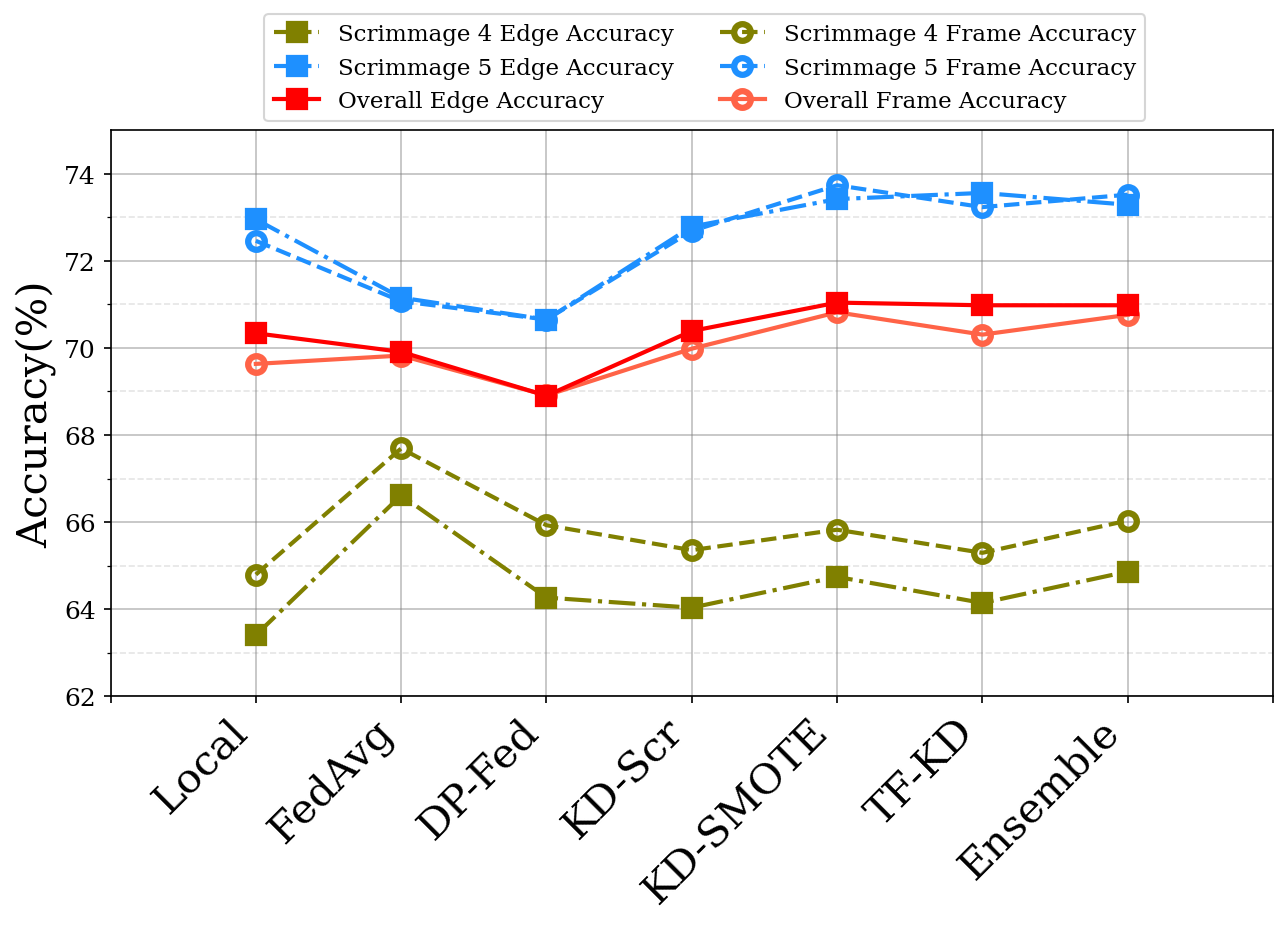

In [17]:
rows = [7, 0, 1, 2, 3, 4, 5, 6, 7]
ploteres = res_edges.reindex(rows)

ploteres.iloc[0, ploteres.columns.get_loc('Algorithm')] = ''
ploteres.iloc[8, ploteres.columns.get_loc('Algorithm')] = ''

ploteres.rename(columns={'Scrimmage 4': 'Scrimmage 4 Edge Accuracy', 
                         'Scrimmage 5': 'Scrimmage 5 Edge Accuracy',
                         'Combined': 'Overall Edge Accuracy'}, inplace=True)

rows = [7, 0, 1, 2, 3, 4, 5, 6, 7]
plotfres = res_frames.reindex(rows)

plotfres.iloc[0, plotfres.columns.get_loc('Algorithm')] = ''
plotfres.iloc[8, plotfres.columns.get_loc('Algorithm')] = ''

plotfres.rename(columns={'Scrimmage 4': 'Scrimmage 4 Frame Accuracy', 
                         'Scrimmage 5': 'Scrimmage 5 Frame Accuracy',
                         'Combined': 'Overall Frame Accuracy'}, inplace=True)

ylmin = math.floor(min(min(res_edges.min()[1:9]),min(res_frames.min()[1:9]))) - 1
ylmax = math.ceil(max(max(res_edges.max()[1:9]),max(res_frames.max()[1:9]))) + 1

fig = plt.figure(figsize=(10, 5), dpi=150)

plt.rcParams['savefig.facecolor']='white'
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax = plt.gca()

plotfres.plot(kind='line',x='Algorithm',y='Scrimmage 4 Frame Accuracy', color = 'olive',
             markerfacecolor = 'none', lineStyle = '--', marker = 'o', markeredgewidth = 3, 
              markerSize=8, lineWidth=2, ax=ax)

plotfres.plot(kind='line',x='Algorithm',y='Scrimmage 5 Frame Accuracy', 
             color = 'dodgerblue', lineStyle = '--', marker = 'o', markerSize=8, 
             markerfacecolor = 'none', markeredgewidth = 3, lineWidth=2, ax=ax)

plotfres.plot(kind='line',x='Algorithm',y='Overall Frame Accuracy', 
             color = 'tomato', lineStyle = '-', marker = 'o', markerSize=8, 
             markerfacecolor = 'none', markeredgewidth = 3, lineWidth=2, ax=ax)

ploteres.plot(kind='line',x='Algorithm',y='Scrimmage 4 Edge Accuracy', color = 'olive',
             lineStyle = '-.', marker = 's', markeredgewidth = 3, 
              markerSize=8, lineWidth=2, ax=ax)

ploteres.plot(kind='line',x='Algorithm',y='Scrimmage 5 Edge Accuracy', 
             color = 'dodgerblue', lineStyle = '-.', marker = 's', markerSize=8, 
             markeredgewidth = 3, lineWidth=2, ax=ax)

ploteres.plot(kind='line',x='Algorithm',y='Overall Edge Accuracy', color = 'r',
             lineStyle = '-', marker = 's', markerSize=8, markeredgewidth = 3, 
              lineWidth=2, ax=ax)

ax.axes.set_ylim(ylmin,ylmax)
major_ticks = np.arange(ylmin, ylmax, 2)
minor_ticks = np.arange(ylmin, ylmax, 1)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(axis = 'both', which='major', linestyle='solid', color = 'gray', alpha=0.5)
ax.grid(axis = 'y', which='minor', linestyle='--', color = 'gray', alpha=0.2)

plt.xticks(list(range(len(ploteres))), list(ploteres['Algorithm']), rotation=45, ha='right')

ax.axes.xaxis.label.set_visible(False)
ax.get_legend().remove()
plt.ylabel('Accuracy(%)')

handles, labels = ax.get_legend_handles_labels()

# We plot edges at the end to keep their lines on top, but we want their labels to come first
neworder = [3, 4, 5, 0, 1, 2]
handles = [handles[i] for i in neworder]
labels = [labels[i] for i in neworder]

fig.legend(handles, labels, bbox_to_anchor=(0.22,1.05), loc="upper left", ncol=2)


plt.savefig('Accr.png',dpi = 150)
plt.show()


# Example Nodes Plot

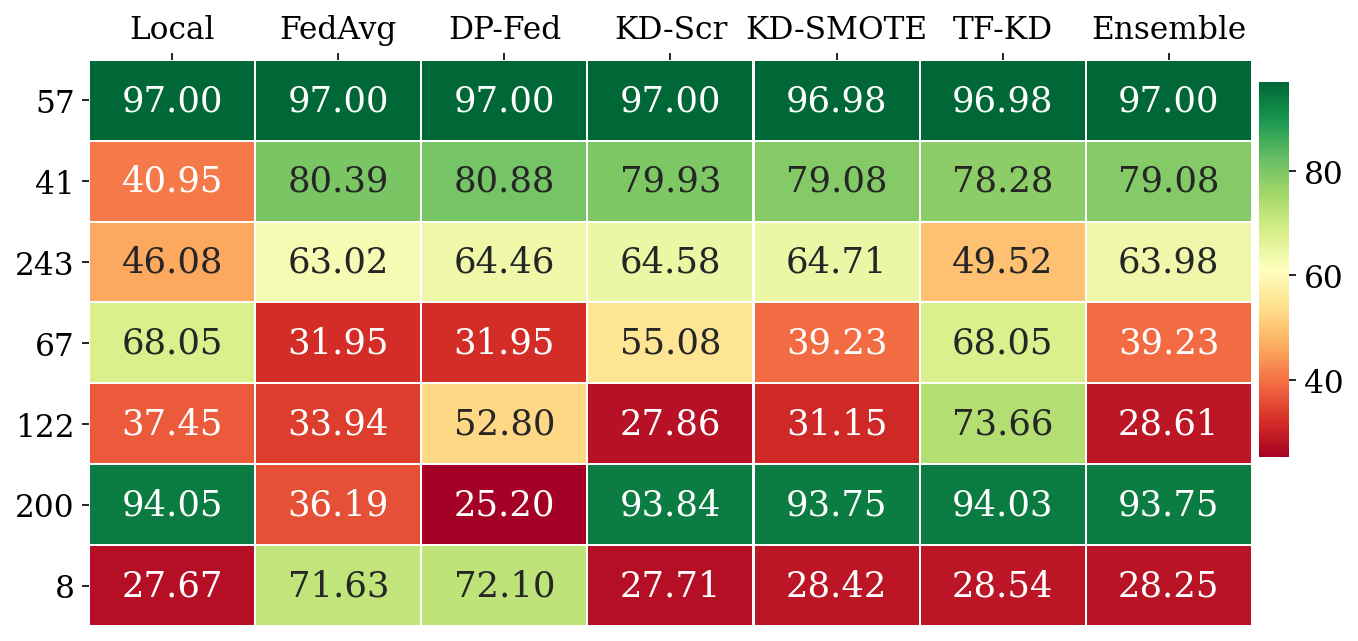

In [18]:
rows = [57,41,243,67,122,200,8]
edge_res_5_zoom = edge_res_5.reindex(rows)

fig = plt.figure(figsize=(10, 5), dpi=150)

plt.rcParams['savefig.facecolor']='white'
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('axes', titlesize=15)  # fontsize of the figure title
# create some labels
# attack_labels = [ "{0:d}".format(i) for i in attacks ]

# create a color map with random colors
#colmap = matplotlib.colors.ListedColormap(np.random.random((21,3)))
#colmap.colors[0] = [0,0,0]
# this is the real plotting part
ax = fig.add_subplot(111)
cbar_ax = fig.add_axes([.905, .35, .02, .5])
hmap = sns.heatmap(edge_res_5_zoom, linewidths=.5, annot=True, fmt='.2f', annot_kws={"fontsize":17},
            cmap='RdYlGn', ax=ax, cbar_ax = cbar_ax, cbar=True)
ax.xaxis.tick_top()
hmap.set_yticklabels(hmap.get_yticklabels(), rotation = 0)
plt.savefig('Nodes.png',dpi = 150)

plt.show()

# Accuracy vs Frame Error Ratio Plot

In [19]:
edge_res_42 = edge_res_4.copy(deep=True)
# edge_res_42 = edge_res_42.drop(columns=['KD-Scr', 'FedAvg', 'Ensemble'])

Algorithm = ['Local', 'FedAvg', 'DP-Fed', 'KD-Scr', 'KD-SMOTE', 'TF-KD', 'Ensemble']
                     

data_ratio4 = {'Algorithm': Algorithm,
        '0.00 - 0.25': list(edge_res_42[stats_edge_res_4['Ratio']<0.25].mean()),
        '0.25 - 0.50': list(edge_res_42[(stats_edge_res_4['Ratio']>=0.25)&(stats_edge_res_4['Ratio']<0.50)].mean()),  
        '0.50 - 0.75': list(edge_res_42[(stats_edge_res_4['Ratio']>=0.50)&(stats_edge_res_4['Ratio']<0.75)].mean()),           
        '0.75 - 1.00': list(edge_res_42[stats_edge_res_4['Ratio']>=0.75].mean()),     
       }
res_ratio4 = pd.DataFrame(data_ratio4, columns = ['Algorithm','0.00 - 0.25','0.25 - 0.50',
                                               '0.50 - 0.75','0.75 - 1.00'])


edge_res_52 = edge_res_5.copy(deep=True)
# edge_res_52 = edge_res_52.drop(columns=['KD-Scr', 'FedAvg', 'Ensemble'])

                     

data_ratio5 = {'Algorithm': Algorithm,
        '0.00 - 0.25': list(edge_res_52[stats_edge_res_5['Ratio']<0.25].mean()),
        '0.25 - 0.50': list(edge_res_52[(stats_edge_res_5['Ratio']>=0.25)&(stats_edge_res_5['Ratio']<0.50)].mean()),  
        '0.50 - 0.75': list(edge_res_52[(stats_edge_res_5['Ratio']>=0.50)&(stats_edge_res_5['Ratio']<0.75)].mean()),           
        '0.75 - 1.00': list(edge_res_52[stats_edge_res_5['Ratio']>=0.75].mean()),     
       }
res_ratio5 = pd.DataFrame(data_ratio5, columns = ['Algorithm','0.00 - 0.25','0.25 - 0.50',
                                               '0.50 - 0.75','0.75 - 1.00'])

edge_res_452 = pd.concat([edge_res_42, edge_res_52])
stats_edge_res_45 = pd.concat([stats_edge_res_4, stats_edge_res_5])

                     

data_ratio45 = {'Algorithm': Algorithm,
        '0.00 - 0.25': list(edge_res_452[stats_edge_res_45['Ratio']<0.25].mean()),
        '0.25 - 0.50': list(edge_res_452[(stats_edge_res_45['Ratio']>=0.25)&(stats_edge_res_45['Ratio']<0.50)].mean()),  
        '0.50 - 0.75': list(edge_res_452[(stats_edge_res_45['Ratio']>=0.50)&(stats_edge_res_45['Ratio']<0.75)].mean()),           
        '0.75 - 1.00': list(edge_res_452[stats_edge_res_45['Ratio']>=0.75].mean()),     
       }
res_ratio45 = pd.DataFrame(data_ratio45, columns = ['Algorithm','0.00 - 0.25','0.25 - 0.50',
                                               '0.50 - 0.75','0.75 - 1.00'])


data_ratio452 = {'Algorithm': Algorithm,
        '0.00 - 0.25': list(edge_res_452[stats_edge_res_45['Ratio']>=0.75].mean()),     
        '0.25 - 0.50': list(edge_res_452[(stats_edge_res_45['Ratio']>=0.50)&(stats_edge_res_45['Ratio']<0.75)].mean()),           
        '0.50 - 0.75': list(edge_res_452[(stats_edge_res_45['Ratio']>=0.25)&(stats_edge_res_45['Ratio']<0.50)].mean()),  
        '0.75 - 1.00': list(edge_res_452[stats_edge_res_45['Ratio']<0.25].mean()),
       }
res_ratio452 = pd.DataFrame(data_ratio452, columns = ['Algorithm','0.00 - 0.25','0.25 - 0.50',
                                               '0.50 - 0.75','0.75 - 1.00'])

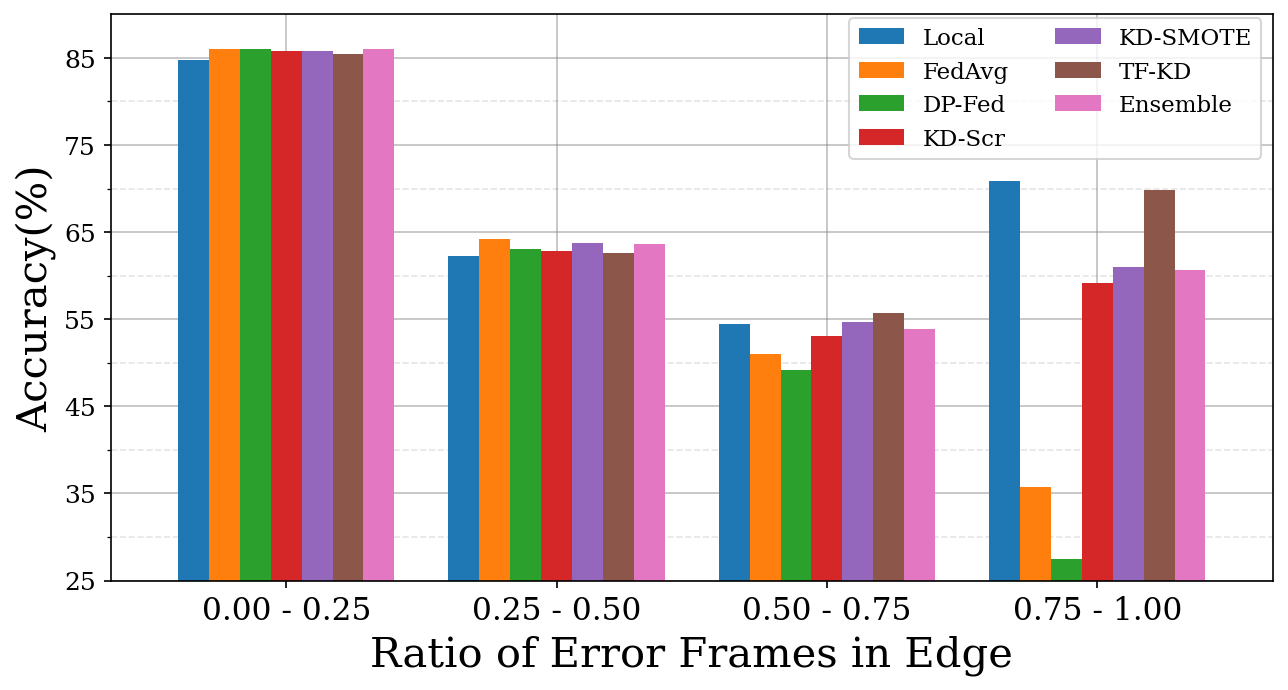

In [20]:
fig = plt.figure(figsize=(10, 5), dpi=150)

plt.rcParams['savefig.facecolor']='white'
plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.axisbelow'] = True

plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


ax=fig.gca()

ax = res_ratio452.set_index('Algorithm').transpose().plot.bar(rot=0, ax=ax, legend=False, width=0.8)


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(.61,.89), loc="upper left", ncol=2)

ylmin = 25
ylmax = 90
ax.axes.set_ylim(ylmin,ylmax)
major_ticks = np.arange(ylmin, ylmax, 10)
minor_ticks = np.arange(ylmin, ylmax, 5)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(axis = 'both', which='major', linestyle='solid', color = 'gray', alpha=0.5)
ax.grid(axis = 'y', which='minor', linestyle='--', color = 'gray', alpha=0.2)
plt.ylabel('Accuracy(%)')
plt.xlabel('Ratio of Error Frames in Edge')

plt.savefig('Ratios.png',dpi = 150)

plt.show()




# Accuracy Delta Table

In [21]:
er4 = edge_res_4.values.tolist()
er5 = edge_res_5.values.tolist()

er45 = er4 + er5

er451 = np.array(er45)
er452 = np.zeros([len(er45),len(er45[0])-1])

for i in range(len(er45)):
    er452[i] = np.array([round(accr-er45[i][0],2) for accr in er45[i][1:]])
    
Algorithms = ['FedAvg', 'DP-Fed', 'KD-Scr', 'KD-Smote', 'TF-KD', 'Ensemble']
    
data_delta = {
        '  ': Algorithms,
        'lower than -25': list(sum(er452<=-25)),
        '-15 to -25': list(sum((er452<=-25) & (er452>-15))),  
        '-15 to -5': list(sum((er452<=-15) & (er452>-5))),           
        '-5 to 5': list(sum((er452<=-5) & (er452>5))), 
        '5 to 15': list(sum((er452<=5) & (er452>15))), 
        '15 to 25': list(sum((er452<=15) & (er452>25))),
        'greater than 25': list(sum(er452>25)), 
       }
res_delta = pd.DataFrame(data_delta, columns = ['  ', 'lower than -20', '-10 to -20', '-10 to 0', 
                                                  '0 to 10', '10 to 20', 'greater than 20'])

In [22]:
er4 = edge_res_4.values.tolist()
er5 = edge_res_5.values.tolist()

er45 = er4 + er5

er451 = np.array(er45)
er452 = np.zeros([len(er45),len(er45[0])-1])

for i in range(len(er45)):
    er452[i] = np.array([round(accr-er45[i][0],2) for accr in er45[i][1:]])
    
Algorithms = ['FedAvg', 'DP-Fed', 'KD-Scr', 'KD-Smote', 'TF-KD', 'Ensemble']
    
data_delta = {
        '  ': Algorithms,
        'lower than -25': list(sum(er452<=-25)),
        '-15 to -25': list(sum((er452<=-15) & (er452>-25))),  
        '-15 to -5': list(sum((er452<=-5) & (er452>-15))),           
        '-5 to 5': list(sum((er452<=5) & (er452>-5))), 
        '5 to 15': list(sum((er452<=15) & (er452>5))), 
        '15 to 25': list(sum((er452<=25) & (er452>15))),
        'greater than 25': list(sum(er452>25)), 
       }
res_delta = pd.DataFrame(data_delta, columns = ['  ', 'lower than -25', '-15 to -25', '-15 to -5', '-5 to 5',
                                                  '5 to 15', '15 to 25', 'greater than 25'])

res_delta2 = res_delta.set_index('  ').transpose()
res_delta2.index.name = 'Delta'
print(res_delta2.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
   &  FedAvg &  DP-Fed &  KD-Scr &  KD-Smote &  TF-KD &  Ensemble \\
Delta           &         &         &         &           &        &           \\
\midrule
lower than -25  &      21 &      26 &       4 &         4 &      4 &         3 \\
-15 to -25      &      22 &      26 &       6 &         4 &      3 &         5 \\
-15 to -5       &      36 &      41 &      46 &        41 &     18 &        26 \\
-5 to 5         &     400 &     390 &     455 &       450 &    490 &       478 \\
5 to 15         &      53 &      51 &      42 &        43 &     38 &        36 \\
15 to 25        &      10 &      14 &       4 &        12 &      3 &         7 \\
greater than 25 &      20 &      14 &       5 &         8 &      6 &         7 \\
\bottomrule
\end{tabular}



In [23]:
print('Percentage of error frames')
print('Overall :',100*(1-sum(scr5_edges_normal+scr4_edges_normal)/sum(scr5_edges_len+scr4_edges_len)))
print('Scr4 :', 100*(1-sum(scr4_edges_normal)/sum(scr4_edges_len)))
print('Scr5 :',100*(1-sum(scr5_edges_normal)/sum(scr5_edges_len)))


Percentage of error frames
Overall : 33.34423572473746
Scr4 : 39.00502374355208
Scr5 : 30.03661970386251
